In [15]:
# import pandas as pd

# # Read the CSV file
# df_URGS = pd.read_csv("test.csv")

# # Option 1: Select columns by index (0-indexed: 0 for column 1, 1 for column 2, 4 for column 5)
# selected_columns = df_URGS.iloc[:, [0, 1, 4]]

# # Option 2: If your CSV file has headers like 'ID', 'Age', and 'Score', you can select by column names:
# # selected_columns = df_URGS[['ID', 'Age', 'Score']]

# # Write the selected columns to a new CSV file
# selected_columns.to_csv("new_test.csv", index=False)

# print("New CSV file created with columns 1, 2, and 5.")


In [16]:
# # Read the CSV file
# df_URGS = pd.read_csv("full_dataset.csv")

# # Option 1: Select columns by index (0-indexed: 0 for column 1, 1 for column 2, 4 for column 5)
# selected_columns = df_URGS.iloc[:, [1, 4, 7, 11, 12, 13, 18]]

# # Write the selected columns to a new CSV file
# selected_columns.to_csv("final_dataset.csv", index=False)

# print("New CSV file created with columns needed for analysis.")


C:\Users\andrew.dilley\AppData\Local\Temp\ipykernel_75428\1959938982.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_URGS = pd.read_csv('final_dataset.csv', parse_dates=['Submission Date'])


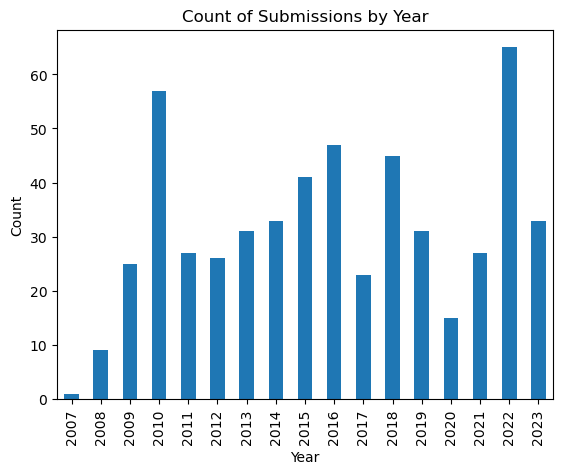

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file. Adjust the filename/path as needed.
df_URGS = pd.read_csv('final_dataset.csv', parse_dates=['Submission Date'])

# Alternatively, if parse_dates doesn't work properly, you can explicitly convert the column:
# df_URGS['Submission Date'] = pd.to_datetime(df_URGS['Submission Date'], format='%m/%d/%Y') 

# Extract the year from the 'Submission Date' column and store it in a new column
df_URGS['Year'] = df_URGS['Submission Date'].dt.year

# Group by year and count the total rows
year_counts = df_URGS.groupby('Year').size()

# Plot the counts as a bar chart
year_counts.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Submissions by Year')

# Display the plot
plt.show()

# (Optional) Save the figure
# plt.savefig('submission_counts_by_year.png')


In [104]:
df_URGS.describe()

,Submission Date,Total Owing,Year
count,536,536.000000,536.000000
mean,2016-06-06 07:42:05.373134336,710.591194,2015.972015
min,2007-09-25 00:00:00,0.000000,2007.000000
25%,2012-08-06 00:00:00,355.582500,2012.000000
50%,2016-04-24 00:00:00,530.440000,2016.000000
75%,2020-03-14 18:00:00,834.252500,2020.000000
max,2023-10-27 00:00:00,6908.500000,2023.000000
std,NaN,649.014144,4.499342


In [105]:
df_URGS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Submission Date  536 non-null    datetime64[ns]
 1   Account No       535 non-null    object        
 2   Suburb           536 non-null    object        
 3   Status           536 non-null    object        
 4   Submitted        536 non-null    object        
 5   Received         536 non-null    object        
 6   Total Owing      536 non-null    float64       
 7   Year             536 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(5)
memory usage: 31.5+ KB


In [106]:
df_URGS['Account No'] = df_URGS['Account No'].astype('string')


In [107]:
df_URGS['Account No'] = df_URGS['Account No'].astype(str).str.strip()

In [108]:
df_URGS['Account No'] = df_URGS['Account No'].apply(lambda x: x + '01' if len(x) == 10 else x)


In [109]:
df_URGS['Account No'] = df_URGS['Account No'].apply(lambda x: "0" + x if len(x) == 11 else x)


In [110]:
df_URGS['Account No'] = df_URGS['Account No'].astype('string')


In [111]:
print(df_URGS['Account No'].head())


0    9330140850015
1     933360205001
2     933073575007
3     933270260001
4     933380010003
Name: Account No, dtype: string


In [112]:
# Step 1: Ensure all values are strings and strip leading/trailing spaces
df_URGS['Account No'] = df_URGS['Account No'].astype(str).str.strip()


df_URGS['Account No'] = df_URGS['Account No'].apply(
    lambda x: x[:2] + '-' + x[2:6] + '-' + x[6:10] + '-' + x[10:] if len(x) == 12 else x
)


# Optionally, preview the result
print(df_URGS['Account No'].head())


0      9330140850015
1    93-3360-2050-01
2    93-3073-5750-07
3    93-3270-2600-01
4    93-3380-0100-03
Name: Account No, dtype: object


In [113]:
df_URGS['Account No'] = df_URGS['Account No'].astype('string')


In [114]:
df_URGS['Account No'] = df_URGS['Account No'].str.strip()

In [115]:
df_URGS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Submission Date  536 non-null    datetime64[ns]
 1   Account No       536 non-null    string        
 2   Suburb           536 non-null    object        
 3   Status           536 non-null    object        
 4   Submitted        536 non-null    object        
 5   Received         536 non-null    object        
 6   Total Owing      536 non-null    float64       
 7   Year             536 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(4), string(1)
memory usage: 31.5+ KB


In [116]:
# Ensure the Account No column is treated as a string
df_URGS['Account No'] = df_URGS['Account No'].astype(str)

# Count the lengths using boolean masks
count_14 = (df_URGS['Account No'].str.len() == 14).sum()
count_15 = (df_URGS['Account No'].str.len() == 15).sum()
count_16 = (df_URGS['Account No'].str.len() == 16).sum()

print("Number of Account No values with 14 characters:", count_14)
print("Number of Account No values with 15 characters:", count_15)
print("Number of Account No values with 16 characters:", count_16)


Number of Account No values with 14 characters: 0
Number of Account No values with 15 characters: 519
Number of Account No values with 16 characters: 0


In [118]:
# Ensure "Account No" is a string (if not already)
df_URGS['Account No'] = df_URGS['Account No'].astype(str)

# Create a new column that calculates the length of each account number
df_URGS['Account No Length'] = df_URGS['Account No'].str.len()

# Filter account numbers that are not 15 characters long and select both relevant columns
invalid_accounts = df_URGS.loc[df_URGS['Account No Length'] != 15, ['Account No', 'Account No Length']]

# Print the result
print("Account numbers that are not 15 characters long and their lengths:")
print(invalid_accounts)


Account numbers that are not 15 characters long and their lengths:
        Account No  Account No Length
0    9330140850015                 13
38   93335003 5010                 13
93   933367    615                 13
146             93                  2
162  9332480700001                 13
182  9331182150017                 13
183  9330341000022                 13
199  9333101100040                 13
283  9330461050013                 13
311  9333100550047                 13
329  9332371100045                 13
343  9331000600029                 13
345  9331000600029                 13
357  9331303340001                 13
494  9330632400014                 13
497  9331762500011                 13
506           <NA>                  4


In [29]:
# Ensure the Account No column is treated as a string
df_URGS['Account No'] = df_URGS['Account No'].astype(str)

# Get the length of each Account No string
lengths = df_URGS['Account No'].str.len()

# Calculate the minimum and maximum length
min_length = lengths.min()
max_length = lengths.max()

print("Minimum length of Account No:", min_length)
print("Maximum length of Account No:", max_length)


Minimum length of Account No: 2
Maximum length of Account No: 15


In [30]:
# Ensure "Account No" is treated as a string
df_URGS['Account No'] = df_URGS['Account No'].astype(str)

# Sort the account numbers by their length using a lambda function as the key
sorted_accounts = df_URGS['Account No'].sort_values(key=lambda x: x.str.len())

# Print the sorted account numbers
print(sorted_accounts)


146                 93
506               <NA>
276         9330271050
395         9331441150
396         9332513850
            ...       
176    93-3138-0650-01
175    93-3119-0150-01
174    93-3374-0750-01
172    93-3271-0350-01
535    93-3334-0300-05
Name: Account No, Length: 536, dtype: object


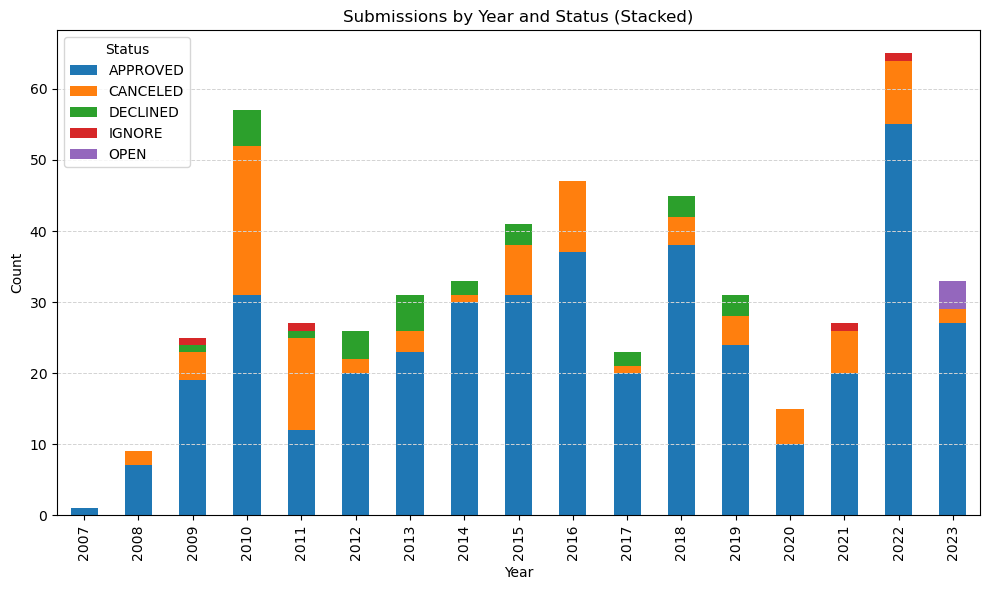

In [31]:

# Extract the year from "Submission Date"
df_URGS['Year'] = df_URGS['Submission Date'].dt.year

# Group by 'Year' and 'Status', then count the occurrences
group_counts = df_URGS.groupby(['Year', 'Status']).size().unstack(fill_value=0)

# Plot the data as a stacked bar chart
group_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Submissions by Year and Status (Stacked)')
plt.legend(title='Status')

plt.grid(axis='y', color='lightgrey', linestyle='--', linewidth=0.7)


# Display the plot
plt.tight_layout()
plt.show()


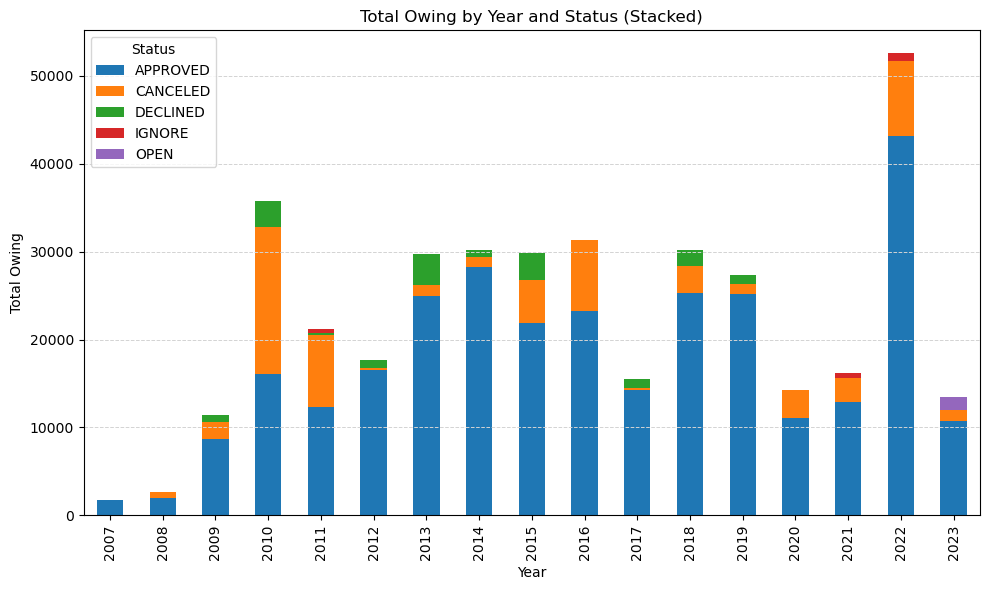

In [32]:
# Extract the year from "Submission Date"
df_URGS['Year'] = df_URGS['Submission Date'].dt.year

# Group by 'Year' and 'Status' and sum the "Total Owing" for each group
total_owing_by_group = df_URGS.groupby(['Year', 'Status'])['Total Owing'].sum().unstack(fill_value=0)

# Plot the totals as a stacked bar chart
ax = total_owing_by_group.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Year')
ax.set_ylabel('Total Owing')
ax.set_title('Total Owing by Year and Status (Stacked)')

# Add light grey horizontal gridlines
ax.grid(axis='y', color='lightgrey', linestyle='--', linewidth=0.7)

plt.legend(title='Status')
plt.tight_layout()
plt.show()


In [33]:
columns_index = df_URGS.columns
print("Columns (Index):", columns_index)


Columns (Index): Index(['Submission Date', 'Account No', 'Suburb', 'Status', 'Submitted',
       'Received', 'Total Owing', 'Year'],
      dtype='object')


In [34]:
# Count occurrences of each 'Account No'
account_counts = df_URGS['Account No'].value_counts()

# Filter to only include accounts with more than one submission
multiple_subs = account_counts[account_counts > 1]

print("Account numbers with multiple submissions:")
print(multiple_subs)


Account numbers with multiple submissions:
Account No
93-3198-0100-01    6
93-3034-7550-01    5
93-3279-0600-02    5
93-3045-1250-01    5
93-3360-2050-01    4
                  ..
93-3185-0400-01    2
93-3241-1200-06    2
93-3355-0900-01    2
93-3130-1020-01    2
93-3268-3950-07    2
Name: count, Length: 80, dtype: int64


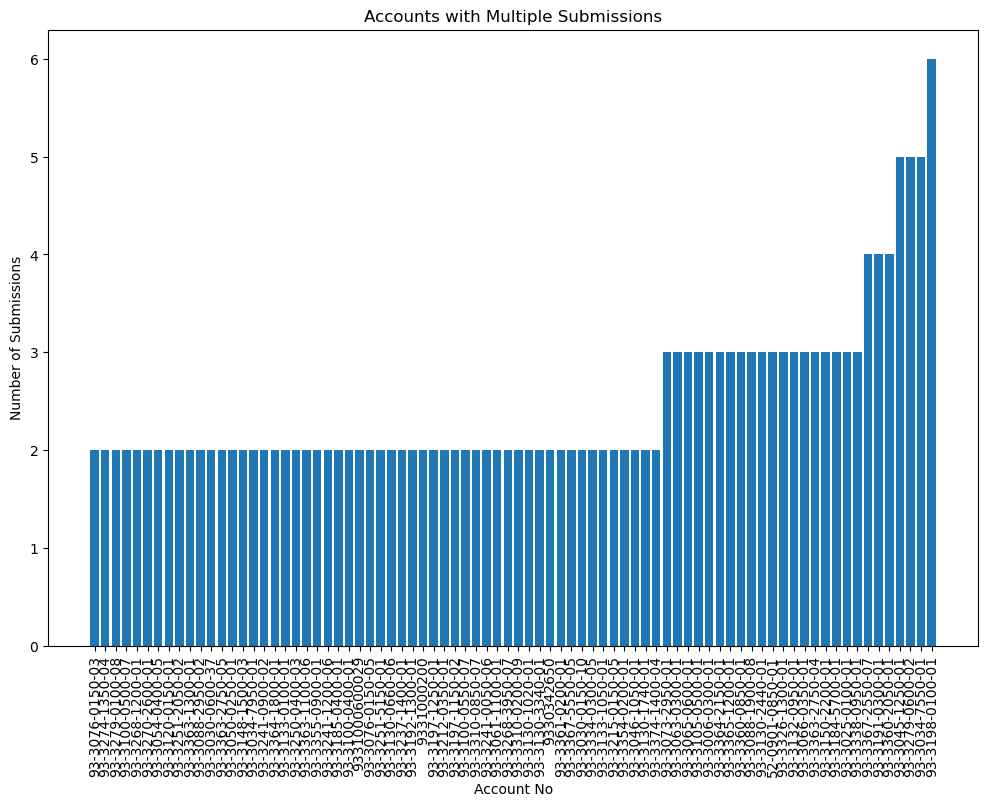

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_URGS is your DataFrame
# Count the submissions per 'Account No'
account_counts = df_URGS['Account No'].value_counts()

# Filter to accounts with multiple submissions
multiple_subs = account_counts[account_counts > 1]

# Sort the counts in ascending order
multiple_subs = multiple_subs.sort_values()

# Set up the plot
plt.figure(figsize=(12, 8))
plt.bar(multiple_subs.index, multiple_subs.values)

plt.xlabel('Account No')
plt.ylabel('Number of Submissions')
plt.title('Accounts with Multiple Submissions')
plt.xticks(rotation=90)  # Rotate x-axis labels if they are too long

plt.show()


In [36]:


# Step 1: Count submissions per account.
account_submissions = df_URGS['Account No'].value_counts()
# account_submissions is a Series: e.g., A001: 2, A002: 2, A003: 1

# Step 2: Create a frequency table: how many accounts have 1 submission, 2 submissions, etc.
submission_summary = account_submissions.value_counts().sort_index()
# submission_summary is a Series where the index is the submission count,
# and the value is the number of accounts with that count.

# Step 3: Calculate the total number of unique accounts.
total_accounts = account_submissions.shape[0]

# Use rename_axis to name the index and reset_index with the 'name' parameter
summary_df = submission_summary.rename_axis('Submission Count').reset_index(name='Number of Accounts')

# Step 4: Calculate the percentage for each submission count.
summary_df['Percentage'] = (summary_df['Number of Accounts'] / total_accounts) * 100

print("Submission Summary:")
print(summary_df)


Submission Summary:
   Submission Count  Number of Accounts  Percentage
0                 1                 338   80.861244
1                 2                  54   12.918660
2                 3                  19    4.545455
3                 4                   3    0.717703
4                 5                   3    0.717703
5                 6                   1    0.239234


In [37]:

# Step 1: Find accounts with multiple submissions
account_counts = df_URGS['Account No'].value_counts()
accounts_multiple = account_counts[account_counts > 1].index

# Filter the DataFrame to only include these accounts
df_multi = df_URGS[df_URGS['Account No'].isin(accounts_multiple)]

# Step 2: For each account, count the number of unique years of submission
unique_years = df_multi.groupby('Account No')['Year'].nunique().rename("Unique Year Count")

# Combine the submission count with the unique year count in a summary table
submission_summary = account_counts.loc[accounts_multiple].rename("Submission Count").to_frame()
submission_summary = submission_summary.join(unique_years)

# Step 3: Add a flag to indicate if the multiple submissions occurred in different years
submission_summary['Different Years'] = submission_summary['Unique Year Count'] == submission_summary['Submission Count']


print("Submission Summary for Accounts with Multiple Submissions:")
print(submission_summary)


Submission Summary for Accounts with Multiple Submissions:
                 Submission Count  Unique Year Count  Different Years
Account No                                                           
93-3198-0100-01                 6                  3            False
93-3034-7550-01                 5                  4            False
93-3279-0600-02                 5                  4            False
93-3045-1250-01                 5                  3            False
93-3360-2050-01                 4                  3            False
...                           ...                ...              ...
93-3185-0400-01                 2                  1            False
93-3241-1200-06                 2                  1            False
93-3355-0900-01                 2                  2             True
93-3130-1020-01                 2                  2             True
93-3268-3950-07                 2                  2             True

[80 rows x 3 columns]


In [38]:
# Filter the DataFrame for account '933198010001'
filtered_df = df_URGS[df_URGS['Account No'] == '933198010001'].copy()

# Convert the 'Submission Date' column to datetime
filtered_df['Submission Date'] = pd.to_datetime(filtered_df['Submission Date'])

# Sort the DataFrame by 'Submission Date'
sorted_df = filtered_df.sort_values(by='Submission Date')

print("Sorted submission dates for account 933198010001:")
print(sorted_df['Submission Date'].to_string(index=False))

Sorted submission dates for account 933198010001:
Series([], )


In [39]:


# If your DataFrame does not already have a 'Year' column, you can extract it like so:
# df_URGS['Submission Date'] = pd.to_datetime(df_URGS['Submission Date'])
# df_URGS['Year'] = df_URGS['Submission Date'].dt.year

# Step 1: Group by 'Account No' and 'Year' and count submissions for each combination.
grouped = df_URGS.groupby(['Account No', 'Year']).size().reset_index(name='Submission Count')

# Step 2: For each group (account-year), consider submissions beyond the first as duplicates.
# For example, if an account submitted 3 times in a year, then duplicate submissions = 3 - 1 = 2.
grouped['Duplicate Submissions'] = grouped['Submission Count'].apply(lambda count: count - 1 if count > 1 else 0)

# Step 3: Group by 'Year' to calculate the total duplicate submissions per year.
yearly_duplicates = grouped.groupby('Year')['Duplicate Submissions'].sum().reset_index()

print("Total multiple (duplicate) submissions per year:")
print(yearly_duplicates)


Total multiple (duplicate) submissions per year:
    Year  Duplicate Submissions
0   2007                      0
1   2008                      0
2   2009                      0
3   2010                      2
4   2011                      2
5   2012                      0
6   2013                      2
7   2014                      0
8   2015                      0
9   2016                      0
10  2017                      0
11  2018                      1
12  2019                      3
13  2020                      2
14  2021                      2
15  2022                     14
16  2023                      6


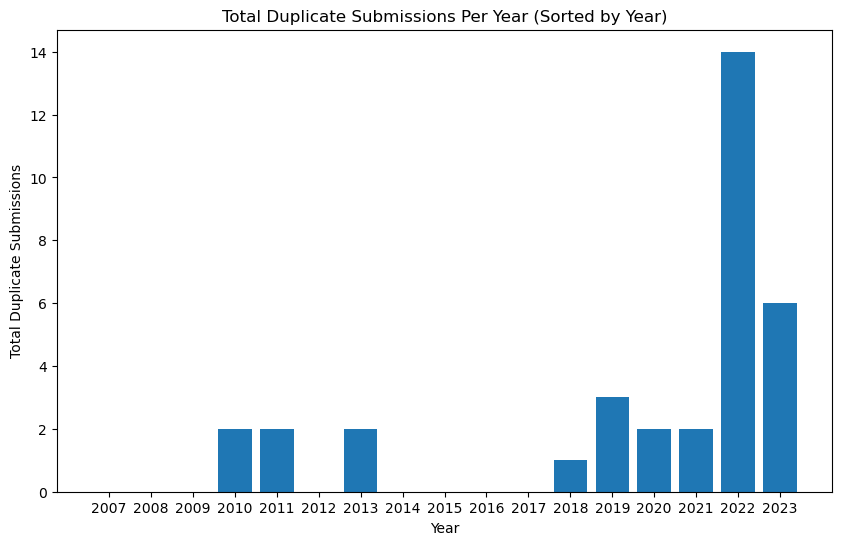

In [40]:
# Ensure 'Submission Date' is in datetime format (if needed)
df_URGS['Submission Date'] = pd.to_datetime(df_URGS['Submission Date'])

# Step 1: Group by 'Account No' and 'Year' to get submission counts per account per year.
grouped = df_URGS.groupby(['Account No', 'Year']).size().reset_index(name='Submission Count')

# Step 2: For each account-year group, calculate duplicate submissions (each submission beyond the first is considered a duplicate).
grouped['Duplicate Submissions'] = grouped['Submission Count'].apply(lambda count: count - 1 if count > 1 else 0)

# Step 3: Group by 'Year' to get total duplicate submissions per year.
yearly_duplicates = grouped.groupby('Year')['Duplicate Submissions'].sum().reset_index()

# Step 4: Sort the DataFrame by 'Year'
yearly_duplicates_sorted = yearly_duplicates.sort_values(by='Year')

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(yearly_duplicates_sorted['Year'].astype(str), yearly_duplicates_sorted['Duplicate Submissions'])
plt.xlabel("Year")
plt.ylabel("Total Duplicate Submissions")
plt.title("Total Duplicate Submissions Per Year (Sorted by Year)")
plt.show()


In [41]:
df_hardship_aging = pd.read_csv('Hardship Aging Debt.csv')


In [42]:
columns_index = df_hardship_aging.columns
print("Columns (Index):", columns_index)


Columns (Index): Index(['Month', 'Year', 'Property No', 'Property Address / Sundry Debtor',
       'Account No', 'Invoice Class', 'Pay Arr. Type', '30 Days', '60 Days',
       '90 Days', '120 Days', '120 + Days', '365 Days', '365 + Days'],
      dtype='object')


In [43]:
print(df_hardship_aging.dtypes)


Month                               object
Year                                object
Property No                         object
Property Address / Sundry Debtor    object
Account No                          object
Invoice Class                       object
Pay Arr. Type                       object
30 Days                             object
60 Days                             object
90 Days                             object
120 Days                            object
120 + Days                          object
365 Days                            object
365 + Days                          object
dtype: object


In [44]:
df_hardship_aging.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425 entries, 0 to 1424
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Month                             1425 non-null   object
 1   Year                              1425 non-null   object
 2   Property No                       1425 non-null   object
 3   Property Address / Sundry Debtor  1425 non-null   object
 4   Account No                        1425 non-null   object
 5   Invoice Class                     1425 non-null   object
 6   Pay Arr. Type                     1425 non-null   object
 7   30 Days                           1425 non-null   object
 8   60 Days                           1425 non-null   object
 9   90 Days                           1425 non-null   object
 10  120 Days                          1425 non-null   object
 11  120 + Days                        1425 non-null   object
 12  365 Days            

In [45]:
df_hardship_aging.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425 entries, 0 to 1424
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Month                             1425 non-null   object
 1   Year                              1425 non-null   object
 2   Property No                       1425 non-null   object
 3   Property Address / Sundry Debtor  1425 non-null   object
 4   Account No                        1425 non-null   object
 5   Invoice Class                     1425 non-null   object
 6   Pay Arr. Type                     1425 non-null   object
 7   30 Days                           1425 non-null   object
 8   60 Days                           1425 non-null   object
 9   90 Days                           1425 non-null   object
 10  120 Days                          1425 non-null   object
 11  120 + Days                        1425 non-null   object
 12  365 Days            

In [46]:
df_hardship_aging['Account No'] = df_hardship_aging['Account No'].str.replace('-', '', regex=False)


In [47]:
df_hardship_aging.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425 entries, 0 to 1424
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Month                             1425 non-null   object
 1   Year                              1425 non-null   object
 2   Property No                       1425 non-null   object
 3   Property Address / Sundry Debtor  1425 non-null   object
 4   Account No                        1425 non-null   object
 5   Invoice Class                     1425 non-null   object
 6   Pay Arr. Type                     1425 non-null   object
 7   30 Days                           1425 non-null   object
 8   60 Days                           1425 non-null   object
 9   90 Days                           1425 non-null   object
 10  120 Days                          1425 non-null   object
 11  120 + Days                        1425 non-null   object
 12  365 Days            

In [48]:
sample_accounts = df_hardship_aging['Account No'].sample(10, random_state=42)
print(sample_accounts)


628     520066230001
680     520357005005
1085    923298375001
578     360971135001
1010    521428105001
759     520537035001
931     521073225005
727     520399265003
70      024343020001
123     044146080004
Name: Account No, dtype: object


In [49]:
df_URGS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Submission Date  536 non-null    datetime64[ns]
 1   Account No       536 non-null    object        
 2   Suburb           536 non-null    object        
 3   Status           536 non-null    object        
 4   Submitted        536 non-null    object        
 5   Received         536 non-null    object        
 6   Total Owing      536 non-null    float64       
 7   Year             536 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(5)
memory usage: 31.5+ KB


In [50]:
sample_accounts = df_URGS['Account No'].sample(10, random_state=42)
print(sample_accounts)


117    93-3367-2550-07
132    93-3374-1200-06
154    93-3144-0750-01
245    93-3360-2050-01
84     93-3061-0700-01
346    93-3364-1600-01
6      93-3149-2300-01
478    93-3300-0200-01
182      9331182150017
55     93-3241-0650-02
Name: Account No, dtype: object


In [51]:
sample_accounts = df_hardship_aging['Month'].sample(10, random_state=42)
print(sample_accounts)


628      May
680      Oct
1085     May
578      Apr
1010     Nov
759      Jan
931      Aug
727      Feb
70      June
123      Apr
Name: Month, dtype: object


In [52]:
sample_accounts = df_hardship_aging['Year'].sample(10, random_state=42)
print(sample_accounts)


628     2023-24
680     2024-25
1085    2023-24
578     2023-24
1010    2023-24
759     2023-24
931     2023-24
727     2023-24
70      2023-24
123     2023-24
Name: Year, dtype: object


In [53]:
# Create a mapping dictionary
month_mapping = {
    'Jan': 1, 'January': 1,
    'Feb': 2, 'February': 2,
    'Mar': 3, 'March': 3,
    'Apr': 4, 'April': 4,
    'May': 5,
    'Jun': 6, 'June': 6,
    'Jul': 7, 'July': 7,
    'Aug': 8, 'August': 8,
    'Sep': 9, 'Sept': 9, 'September': 9,
    'Oct': 10, 'October': 10,
    'Nov': 11, 'November': 11,
    'Dec': 12, 'December': 12
}

# Map the month names in the 'Month' column to their numerical values and create a new column 'Month_num'
df_hardship_aging['Month_num'] = df_hardship_aging['Month'].map(month_mapping)

# Optionally, view the results
print(df_hardship_aging[['Month', 'Month_num']].head(10))


  Month  Month_num
0  July          7
1   Aug          8
2  Sept          9
3   Oct         10
4   Nov         11
5   Jan          1
6  July          7
7   Aug          8
8  Sept          9
9   Oct         10


In [54]:
import pandas as pd

# Example helper function to compute the calendar year
def compute_calendar_year(row):
    # Extract academic year parts: for "2023-24", start_year will be 2023
    year_str = row['Year']
    start_year = int(year_str.split('-')[0])
    end_year = start_year + 1  # academic year spans one year
    
    # Extract the month from the 'Month' column
    month = row['Month'].strip()  # use strip() in case of extra spaces
    
    # Define months that belong to the later calendar year (Jan to Jun)
    months_jan_to_jun = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June']
    
    # Return the corresponding calendar year based on the month
    if month in months_jan_to_jun:
        return end_year
    else:
        return start_year

# Apply the helper function to each row of the DataFrame
df_hardship_aging['Calendar_Year'] = df_hardship_aging.apply(compute_calendar_year, axis=1)

# Optionally, inspect the result
print(df_hardship_aging[['Year', 'Month', 'Calendar_Year']].head(10))


      Year Month  Calendar_Year
0  2023-24  July           2023
1  2023-24   Aug           2023
2  2023-24  Sept           2023
3  2023-24   Oct           2023
4  2023-24   Nov           2023
5  2023-24   Jan           2024
6  2023-24  July           2023
7  2023-24   Aug           2023
8  2023-24  Sept           2023
9  2023-24   Oct           2023


In [55]:
print(df_hardship_aging[['Year', 'Month', 'Calendar_Year']].head(30))

       Year Month  Calendar_Year
0   2023-24  July           2023
1   2023-24   Aug           2023
2   2023-24  Sept           2023
3   2023-24   Oct           2023
4   2023-24   Nov           2023
5   2023-24   Jan           2024
6   2023-24  July           2023
7   2023-24   Aug           2023
8   2023-24  Sept           2023
9   2023-24   Oct           2023
10  2023-24   Nov           2023
11  2023-24   Dec           2023
12  2023-24   Jan           2024
13  2023-24   Feb           2024
14  2023-24   Mar           2024
15  2023-24   Apr           2024
16  2023-24   May           2024
17  2023-24  June           2024
18  2024-25  July           2024
19  2024-25   Aug           2024
20  2024-25  Sept           2024
21  2024-25   Oct           2024
22  2023-24  June           2024
23  2024-25  July           2024
24  2024-25   Aug           2024
25  2024-25  Sept           2024
26  2024-25   Oct           2024
27  2023-24  July           2023
28  2023-24   Aug           2023
29  2023-2

In [56]:
df_URGS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Submission Date  536 non-null    datetime64[ns]
 1   Account No       536 non-null    object        
 2   Suburb           536 non-null    object        
 3   Status           536 non-null    object        
 4   Submitted        536 non-null    object        
 5   Received         536 non-null    object        
 6   Total Owing      536 non-null    float64       
 7   Year             536 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(5)
memory usage: 31.5+ KB


In [57]:
# Convert Account No to numeric in both dataframes without using .str accessor
df_hardship_aging['Account No'] = pd.to_numeric(df_hardship_aging['Account No'], errors='coerce')
df_URGS['Account No'] = pd.to_numeric(df_URGS['Account No'], errors='coerce')


In [58]:
# For df_URGS, drop rows with missing Account No values, then convert to int64
df_URGS = df_URGS[df_URGS['Account No'].notna()].copy()
df_URGS['Account No'] = df_URGS['Account No'].astype('int64')

# For df_hardship_aging, ensure Account No is also int64 (if it isn't already)
df_hardship_aging['Account No'] = df_hardship_aging['Account No'].astype('int64')

# Optionally verify the types
print(df_URGS['Account No'].dtype)
print(df_hardship_aging['Account No'].dtype)


int64
int64


In [59]:
df_hardship_aging.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425 entries, 0 to 1424
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Month                             1425 non-null   object
 1   Year                              1425 non-null   object
 2   Property No                       1425 non-null   object
 3   Property Address / Sundry Debtor  1425 non-null   object
 4   Account No                        1425 non-null   int64 
 5   Invoice Class                     1425 non-null   object
 6   Pay Arr. Type                     1425 non-null   object
 7   30 Days                           1425 non-null   object
 8   60 Days                           1425 non-null   object
 9   90 Days                           1425 non-null   object
 10  120 Days                          1425 non-null   object
 11  120 + Days                        1425 non-null   object
 12  365 Days            

In [60]:
# List of debt columns to be summed
debt_columns = ["30 Days", "60 Days", "90 Days", "120 Days", "120 + Days", "365 Days", "365 + Days"]

# Clean and convert each debt column to numeric.
for col in debt_columns:
    # Remove any characters except digits and the decimal point, then convert to numeric.
    df_hardship_aging[col] = pd.to_numeric(df_hardship_aging[col].replace(r'[^\d.]', '', regex=True), errors='coerce')

# Create the total_debt column as the sum across the cleaned columns.
df_hardship_aging['total_debt'] = df_hardship_aging[debt_columns].sum(axis=1)

# Optionally, inspect the first few rows to verify the results
print(df_hardship_aging[debt_columns + ['total_debt']].head())


   30 Days  60 Days  90 Days  120 Days  120 + Days  365 Days  365 + Days  \
0    41.79     0.00     0.00     37.18       18.19     18.19         0.0   
1     0.00    41.79     0.00      0.00       35.37     35.37         0.0   
2     0.00     0.00    27.16      0.00        0.00      0.00         0.0   
3    36.49     0.00     0.00      7.16        0.00      0.00         0.0   
4     0.00    33.65     0.00      0.00        0.00      0.00         0.0   

   total_debt  
0      115.35  
1      112.53  
2       27.16  
3       43.65  
4       33.65  


In [61]:
df_hardship_aging.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425 entries, 0 to 1424
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Month                             1425 non-null   object 
 1   Year                              1425 non-null   object 
 2   Property No                       1425 non-null   object 
 3   Property Address / Sundry Debtor  1425 non-null   object 
 4   Account No                        1425 non-null   int64  
 5   Invoice Class                     1425 non-null   object 
 6   Pay Arr. Type                     1425 non-null   object 
 7   30 Days                           1425 non-null   float64
 8   60 Days                           1425 non-null   float64
 9   90 Days                           1425 non-null   float64
 10  120 Days                          1425 non-null   float64
 11  120 + Days                        1425 non-null   float64
 12  365 Da

In [62]:
print(df_hardship_aging.describe())


         Account No      30 Days      60 Days      90 Days     120 Days  \
count  1.425000e+03  1425.000000  1425.000000  1425.000000  1425.000000   
mean   4.717160e+11    86.930947    80.408477    72.875895    68.426568   
std    3.386049e+11   173.258109   212.589191   203.524560   200.086131   
min    1.402202e+10     0.000000     0.000000     0.000000     0.000000   
25%    7.447703e+10     0.000000     0.000000     0.000000     0.000000   
50%    5.203920e+11     0.000000     0.000000     0.000000     0.000000   
75%    9.231311e+11   122.200000    70.370000    43.200000    27.120000   
max    9.333675e+11  1426.540000  5106.340000  4986.340000  4782.630000   

         120 + Days     365 Days    365 + Days    Month_num  Calendar_Year  \
count   1425.000000  1425.000000   1425.000000  1425.000000    1425.000000   
mean     925.486393   388.381551    537.104842     6.940351    2023.662456   
std     1581.247015   599.429393   1272.982636     3.127435       0.473038   
min        0

In [63]:
df_URGS.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 0 to 497
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Submission Date  39 non-null     datetime64[ns]
 1   Account No       39 non-null     int64         
 2   Suburb           39 non-null     object        
 3   Status           39 non-null     object        
 4   Submitted        39 non-null     object        
 5   Received         39 non-null     object        
 6   Total Owing      39 non-null     float64       
 7   Year             39 non-null     int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 2.6+ KB


In [64]:
print(df_URGS.describe())

                     Submission Date    Account No  Total Owing         Year
count                             39  3.900000e+01    39.000000    39.000000
mean   2014-11-05 03:41:32.307692288  3.116466e+12   595.871795  2014.410256
min              2009-09-22 00:00:00  9.300000e+01    36.730000  2009.000000
25%              2010-02-28 00:00:00  9.331672e+09   303.840000  2010.000000
50%              2012-10-15 00:00:00  9.333260e+09   485.450000  2012.000000
75%              2018-04-23 00:00:00  9.330547e+12   795.155000  2018.000000
max              2023-10-27 00:00:00  9.333101e+12  2100.360000  2023.000000
std                              NaN  4.452108e+12   430.760886     4.998515


In [65]:
# Ensure 'Submission Date' is a datetime column. If it's not, convert it:
df_URGS['Submission Date'] = pd.to_datetime(df_URGS['Submission Date'], errors='coerce')

# Extract the month number and create a new column 'Month_num'
df_URGS['Month_num'] = df_URGS['Submission Date'].dt.month

# Optionally, inspect the results
print(df_URGS[['Submission Date', 'Month_num']].head())


    Submission Date  Month_num
0        2023-10-27         10
10       2016-07-25          7
23       2014-06-10          6
27       2022-09-09          9
146      2015-05-13          5


In [66]:
df_URGS.rename(columns={'Year': 'Calendar_year'}, inplace=True)

# Optionally, check the updated column names
print(df_URGS.columns)


Index(['Submission Date', 'Account No', 'Suburb', 'Status', 'Submitted',
       'Received', 'Total Owing', 'Calendar_year', 'Month_num'],
      dtype='object')


In [67]:
print(df_URGS[['Submission Date', 'Month_num', 'Calendar_year']].head())


    Submission Date  Month_num  Calendar_year
0        2023-10-27         10           2023
10       2016-07-25          7           2016
23       2014-06-10          6           2014
27       2022-09-09          9           2022
146      2015-05-13          5           2015


In [68]:
# Step 1: Rename the Calendar_Year column in df_hardship_aging to match the URGS column name
df_hardship_aging.rename(columns={'Calendar_Year': 'Calendar_year'}, inplace=True)

# Step 2: Merge the two DataFrames on 'Account No', 'Month_num', and 'Calendar_year'
merged_df = pd.merge(
    df_URGS,
    df_hardship_aging[['Account No', 'Calendar_year', 'total_debt']],
    on=['Account No','Calendar_year', 'Month_num'],
    how='left'
)

# Step 3: Rename the joined column to "Debt At Submission" in the merged DataFrame
merged_df.rename(columns={'total_debt': 'Debt At Submission'}, inplace=True)

# Optionally, if you want df_URGS to reflect this new column, assign merged_df back to df_URGS
df_URGS = merged_df

# Inspect the result
print(df_URGS.head())


KeyError: 'Month_num'

In [ ]:
nan_debt_count = df_URGS['Debt At Submission'].isna().sum()
print("Number of submissions with NaN Debt At Submission:", nan_debt_count)


In [ ]:
value_count = df_URGS['Debt At Submission'].notna().sum()
print("Number of submissions with a value for Debt At Submission:", value_count)


In [ ]:
sample_accounts = df_URGS['Account No'].sample(10, random_state=42)
print(sample_accounts)


In [ ]:
# Filter the DataFrame for the given account number after stripping any whitespace
matching_rows = df_hardship_aging[df_hardship_aging['Account No'].str.strip() in ('933367255007')]

# Check if any rows were returned
if not matching_rows.empty:
    print("Matching account found:")
    print(matching_rows)
else:
    print("No matching account found.")
